# Busqueda por Amplitud

A continuacion se ejemplifica la busqueda por amplitud revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano.


In [118]:
# Busqueda en Amplitud - Breadth First Search
import networkx as nx
import matplotlib.pyplot as plt
# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

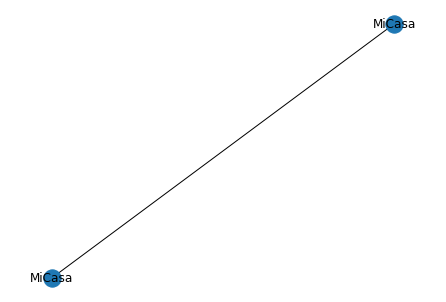

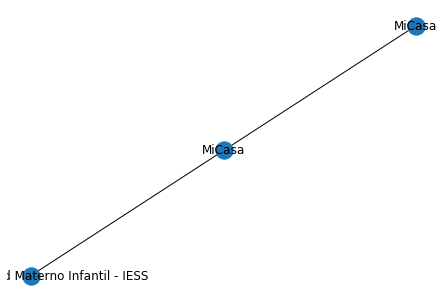

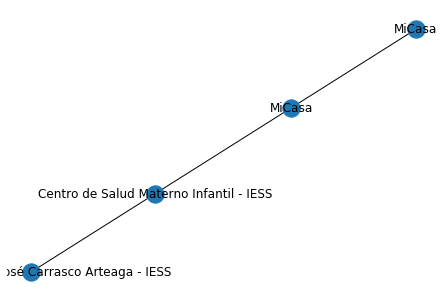

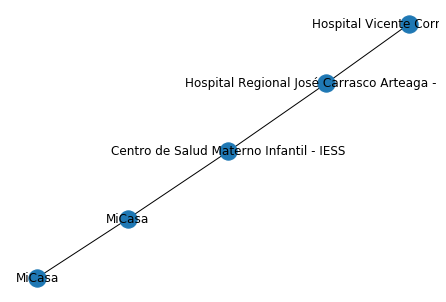

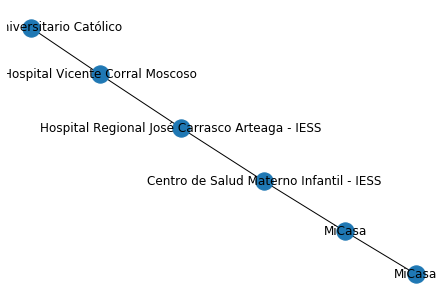

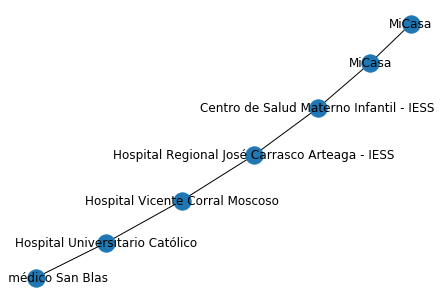

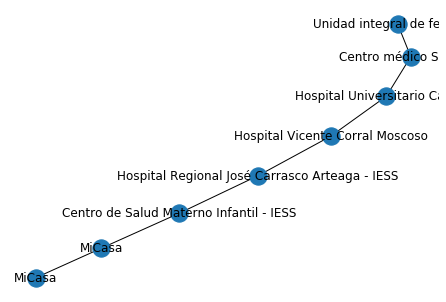

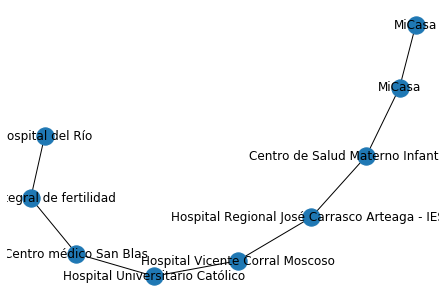

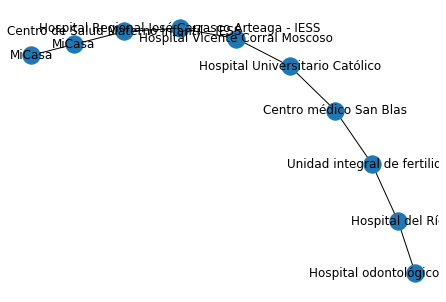

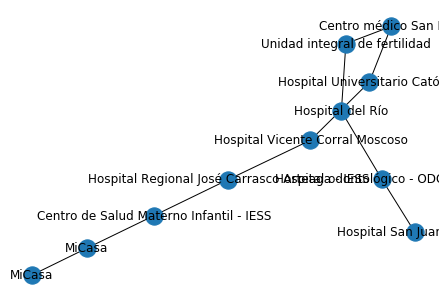

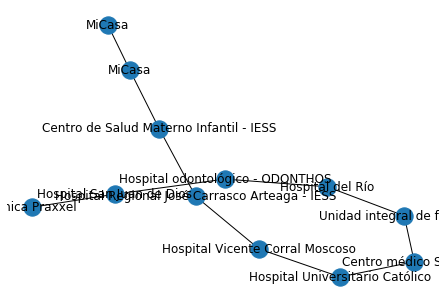

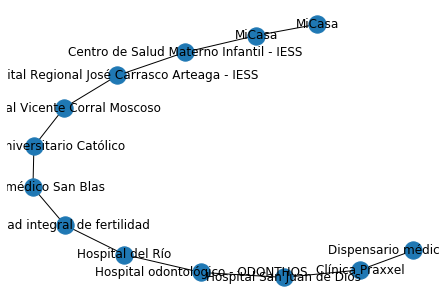

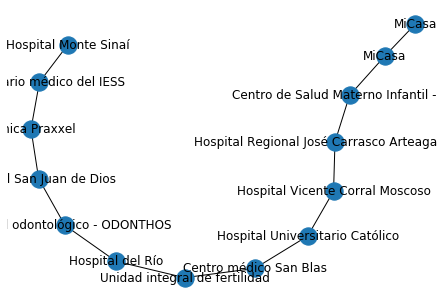

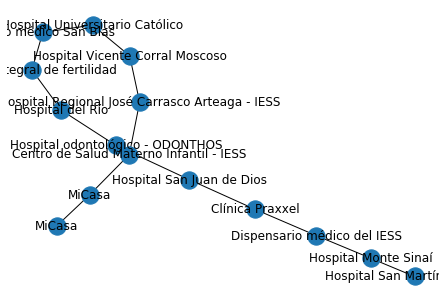

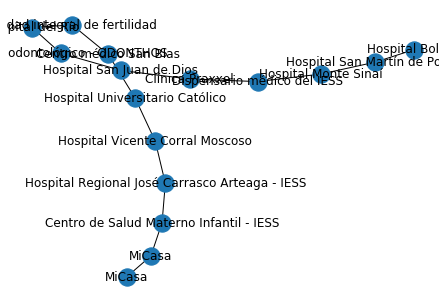

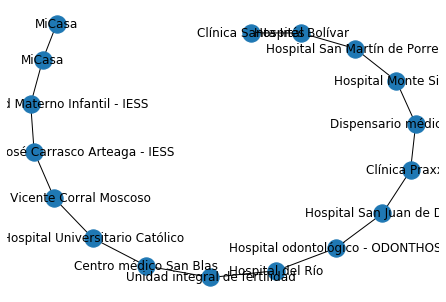

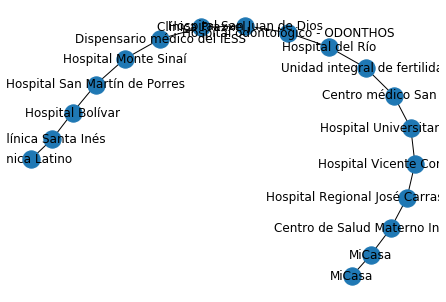

['MiCasa', 'Centro de Salud Materno Infantil - IESS', 'Hospital Universitario Católico', 'Clínica Praxxel', 'Hospital San Martín de Porres', 'Clínica Latino', 'Clínica Humanitaria']


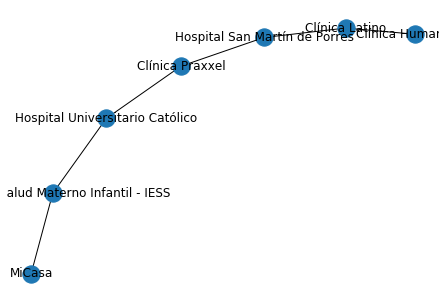

Nodos:  7 ['MiCasa', 'Centro de Salud Materno Infantil - IESS', 'Hospital Universitario Católico', 'Clínica Praxxel', 'Hospital San Martín de Porres', 'Clínica Latino', 'Clínica Humanitaria']
Enlaces:  6 [('MiCasa', 'Centro de Salud Materno Infantil - IESS'), ('Centro de Salud Materno Infantil - IESS', 'Hospital Universitario Católico'), ('Hospital Universitario Católico', 'Clínica Praxxel'), ('Clínica Praxxel', 'Hospital San Martín de Porres'), ('Hospital San Martín de Porres', 'Clínica Latino'), ('Clínica Latino', 'Clínica Humanitaria')]


In [120]:
# Implementacion del metodo de busqueda por amplitud

def search_Amplitud_solution(connections, init_state, solution):
    LF=nx.Graph()
    LF.add_node(init_state)
    
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos
   

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
   
   
    
    color_map = []
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        #color_map.append('yellow')
        LF.add_edge(node, init_state)
        init_state = node
        
       
       
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            
           
            
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            
          
            
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                #print(chld)
                     
                #LF.add_edge(chld, init_node)
                #init_node = chld
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
                    
                  
            node.set_child(child_list)
            nx.draw(LF, with_labels=True)
            plt.show()
          
            
def graficar(init_state, result):
    G=nx.Graph()
    nodoInicial = "Ecuador"
    
    result.remove(init_state)
    
    G.add_node(init_state)
    for n in result:
        G.add_edge(n, init_state)
        init_state = n 
    

    nx.draw(G,with_labels=True)
    plt.show()

    print ("Nodos: ", G.number_of_nodes(), G.nodes())
    print ("Enlaces: ", G.number_of_edges(),G.edges())



if __name__ == "__main__":
    connections = {
        'MiCasa': {'Hospital Regional José Carrasco Arteaga - IESS','Centro de Salud Materno Infantil - IESS'},
        'Hospital Regional José Carrasco Arteaga - IESS': {'Unidad integral de fertilidad','Hospital del Río', 'MiCasa'},
        'Unidad integral de fertilidad': {'Hospital Regional José Carrasco Arteaga - IESS'},
        'Hospital del Río': {'Hospital Regional José Carrasco Arteaga - IESS'},
        'Centro de Salud Materno Infantil - IESS':{'Hospital Vicente Corral Moscoso','Centro médico San Blas','Hospital Universitario Católico', 'MiCasa'},
        'Hospital Vicente Corral Moscoso':{'Centro de Salud Materno Infantil - IESS','Hospital odontológico - ODONTHOS','Hospital San Juan de Dios'},
        'Centro médico San Blas': {'Centro de Salud Materno Infantil - IESS','Dispensario médico del IESS'},
        'Hospital Universitario Católico':{'Clínica Praxxel','Centro de Salud Materno Infantil - IESS'},
        'Hospital odontológico - ODONTHOS':{'Hospital Monte Sinaí','Hospital Vicente Corral Moscoso'},
        'Hospital San Juan de Dios':{'Hospital Monte Sinaí','Hospital Vicente Corral Moscoso'},
        'Dispensario médico del IESS':{'Clínica Santa Inés','Hospital Bolívar','Centro médico San Blas'},
        'Clínica Praxxel':{'Hospital Bolívar','Hospital San Martín de Porres','Hospital Universitario Católico'},
        'Hospital San Martín de Porres':{'Clínica Praxxel','Clínica Latino'},
        'Hospital Bolívar':{'Clínica Latino','Dispensario médico del IESS'},
        'Clínica Santa Inés':{'Hospital San Juan de Dios'},
        'Hospital Monte Sinaí':{'Hospital odontológico - ODONTHOS'},
        'Clínica Latino':{'Hospital San Martín de Porres','Hospital Bolívar','Clínica Humanitaria'},
        'Clínica Humanitaria':{'Clínica Latino'}
    }

    init_state = 'MiCasa'
    solution = 'Clínica Humanitaria'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        graficar(init_state, result)
    else:
        print("No hay solucion !!!!")
   
        


# Tarea: Cálculo del factor de ramificación
Realice el cálculo del factor de ramificación del problema de las N reinas (con N = 4). Para ello deberá realizar las siguientes actividades:

Asumir que el factor de ramificación es constante.
Despejar el valor de b
Consultar sitios externos sobre cómo realizar el cálculo

In [71]:
# Agregar la solucion en markdown (Informe)

## Practica

Implementar un algoritmo que me permita dibujar las conexiones y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Hospitales, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

In [14]:
# Implementar

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [2, 3, 1, 4], [2, 1, 3, 4], [1, 2, 3, 4]]


# Conclusiones